### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./전처리전데이터/raw.csv')

### 결측치 확인하기

In [2]:
#결측행 확인
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

### 증기압
<br> 같은 날짜 두개의 결측 -> 당일 22개의 데이터의 mean으로 대체해 df 업데이트

In [3]:
# '증기압(hPa)' 결측값이 있는 행 필터링
filtered_df = df[df[['증기압(hPa)']].isnull().any(axis=1)]

# 필터링된 데이터프레임 출력
filtered_df[['측정일시','증기압(hPa)']]

,측정일시,증기압(hPa)
611,2018-01-26 12:00:00,NaN
612,2018-01-26 13:00:00,NaN


In [4]:
filtered_df = df[df['측정일시'].str.contains('2018-01-26')]
mean_jp = round(filtered_df['증기압(hPa)'].mean(), 1) #소숫점 한자리
#mean_jp # 0.7

df.loc[df['측정일시'] == '2018-01-26 12:00:00', '증기압(hPa)'] = mean_jp
df.loc[df['측정일시'] == '2018-01-26 13:00:00', '증기압(hPa)'] = mean_jp

df[df['측정일시'].str.contains('2018-01-26')][['측정일시', '증기압(hPa)']]

,측정일시,증기압(hPa)
599,2018-01-26 00:00:00,0.6
600,2018-01-26 01:00:00,0.6
601,2018-01-26 02:00:00,0.6
602,2018-01-26 03:00:00,0.6
603,2018-01-26 04:00:00,0.6
604,2018-01-26 05:00:00,0.6
605,2018-01-26 06:00:00,0.6
606,2018-01-26 07:00:00,0.6
607,2018-01-26 08:00:00,0.6
608,2018-01-26 09:00:00,0.6


In [5]:
df[['증기압(hPa)']].isnull().sum()

증기압(hPa)    0
dtype: int64

### 전운량(10분위)<br>
데이터 앞 뒤 각 두행씩 사용해 선형 보간으로 결측 대체. <br>
단, 첫 두행 결측은 세번째 행값 0.0으로 대체

In [6]:
df[df['전운량(10분위)'].isnull()][['측정일시', '전운량(10분위)']]

,측정일시,전운량(10분위)
0,2018-01-01 01:00:00,NaN
1,2018-01-01 02:00:00,NaN
18,2018-01-01 19:00:00,NaN
19,2018-01-01 20:00:00,NaN
21,2018-01-01 22:00:00,NaN
...,...,...
22176,2020-07-13 01:00:00,NaN
22963,2020-08-14 20:00:00,NaN
25339,2020-11-21 20:00:00,NaN
31722,2021-08-14 19:00:00,NaN


In [7]:
df.loc[df['측정일시'] == '2018-01-01 01:00:00', '전운량(10분위)'] = 0.0
df.loc[df['측정일시'] == '2018-01-01 02:00:00', '전운량(10분위)'] = 0.0

In [8]:
def linear_bg(df, col, limit=2):

    mis_col = df[col].interpolate(method='linear', limit_direction='both', limit=limit)
    return mis_col

In [9]:
linear_ac = linear_bg(df, '전운량(10분위)', limit=2)
df.loc[:, '전운량(10분위)'] = linear_ac
df[['측정일시', '전운량(10분위)']]

,측정일시,전운량(10분위)
0,2018-01-01 01:00:00,0.0
1,2018-01-01 02:00:00,0.0
2,2018-01-01 03:00:00,0.0
3,2018-01-01 04:00:00,0.0
4,2018-01-01 05:00:00,0.0
...,...,...
43818,2022-12-31 19:00:00,0.0
43819,2022-12-31 20:00:00,4.0
43820,2022-12-31 21:00:00,7.0
43821,2022-12-31 22:00:00,8.0


In [10]:
df[['전운량(10분위)']].isnull().sum()

전운량(10분위)    0
dtype: int64

### 중하층운량(10분위)<br>
데이터 앞 뒤 각 두행씩 사용해 선형 보간으로 결측 대체

In [11]:
df[df['중하층운량(10분위)'].isnull()][['측정일시', '중하층운량(10분위)']]

,측정일시,중하층운량(10분위)
115,2018-01-05 20:00:00,NaN
120,2018-01-06 01:00:00,NaN
168,2018-01-08 01:00:00,NaN
211,2018-01-09 20:00:00,NaN
378,2018-01-16 19:00:00,NaN
...,...,...
22149,2020-07-11 22:00:00,NaN
22150,2020-07-11 23:00:00,NaN
22152,2020-07-12 01:00:00,NaN
22153,2020-07-12 02:00:00,NaN


In [12]:
linear_mc = linear_bg(df, '중하층운량(10분위)', limit=2)
df.loc[:, '중하층운량(10분위)'] = linear_mc
df[['측정일시', '중하층운량(10분위)']]

,측정일시,중하층운량(10분위)
0,2018-01-01 01:00:00,0.0
1,2018-01-01 02:00:00,0.0
2,2018-01-01 03:00:00,0.0
3,2018-01-01 04:00:00,0.0
4,2018-01-01 05:00:00,0.0
...,...,...
43818,2022-12-31 19:00:00,0.0
43819,2022-12-31 20:00:00,2.0
43820,2022-12-31 21:00:00,7.0
43821,2022-12-31 22:00:00,8.0


In [13]:
df[['중하층운량(10분위)']].isnull().sum()

중하층운량(10분위)    0
dtype: int64

### 오염데이터 결측처리하기
 -> "SO2", "CO", "O3", "NO2", "PM10", "PM2.5"

<br>조건부 평균 대치법 KNN적용

In [14]:
def find_non_nan_value(df, column, index, step):
    while index >= 0 and index < len(df):
        if pd.notnull(df.iloc[index][column]):
            return df.iloc[index][column]
        index += step
    return None

def fill_na_with_neighbors_avg(df, column):
    for i in range(len(df)):
        if pd.isnull(df.iloc[i][column]):
            prev_value = find_non_nan_value(df, column, i - 1, -1)
            next_value = find_non_nan_value(df, column, i + 1, 1)
            
            if prev_value is not None and next_value is not None:
                df.at[i, column] = (prev_value + next_value) / 2
            elif prev_value is not None:
                df.at[i, column] = prev_value
            elif next_value is not None:
                df.at[i, column] = next_value

    return df

# 적용할 열 목록
columns_to_fill = ["SO2", "CO", "O3", "NO2", "PM10", "PM2.5"]

# DataFrame의 인덱스를 정수형으로 변환
df = df.reset_index(drop=True)

# 각 열에 대해 결측치를 대체합니다.
for column in columns_to_fill:
    df = fill_na_with_neighbors_avg(df.copy(), column)

# 결과를 출력합니다.
print(df)

           지역     망                 측정일시    SO2   CO     O3    NO2  PM10  \
0      서울 노원구  도시대기  2018-01-01 01:00:00  0.006  0.5  0.018  0.025  33.0   
1      서울 노원구  도시대기  2018-01-01 02:00:00  0.008  0.8  0.008  0.034  34.0   
2      서울 노원구  도시대기  2018-01-01 03:00:00  0.008  0.9  0.006  0.036  36.0   
3      서울 노원구  도시대기  2018-01-01 04:00:00  0.008  0.8  0.009  0.032  35.0   
4      서울 노원구  도시대기  2018-01-01 05:00:00  0.006  0.6  0.006  0.035  36.0   
...       ...   ...                  ...    ...  ...    ...    ...   ...   
43818  서울 노원구  도시대기  2022-12-31 19:00:00  0.004  1.1  0.002  0.072  65.0   
43819  서울 노원구  도시대기  2022-12-31 20:00:00  0.004  1.4  0.002  0.076  66.0   
43820  서울 노원구  도시대기  2022-12-31 21:00:00  0.004  1.4  0.002  0.074  67.0   
43821  서울 노원구  도시대기  2022-12-31 22:00:00  0.004  1.5  0.002  0.073  67.0   
43822  서울 노원구  도시대기  2022-12-31 23:00:00  0.004  1.4  0.002  0.072  66.0   

       PM2.5  기온(°C)  ...    LPG    전기  CNG  하이브리드(휘발유+전기)  하이브리드(경유+전기)  \
0       15.

In [15]:
#결측치 개수 확인
df[["SO2", "CO", "O3", "NO2", "PM10", "PM2.5"]].isnull().sum()

SO2      0
CO       0
O3       0
NO2      0
PM10     0
PM2.5    0
dtype: int64

## 일조일사 전처리하기

일조량과 일사량이 저녁에는 측정되지 않기 때문에(Q/C플래그로 확인함) NAN 값 0값으로 채우기

In [16]:
#기온에 대한 결측
#pd.set_option('display.max_rows', None)

df[df['일사(MJ/m2)'].isnull()]['측정일시'].unique
df[df['일조(hr)'].isnull()]['측정일시'].unique

<bound method Series.unique of 0        2018-01-01 01:00:00
1        2018-01-01 02:00:00
2        2018-01-01 03:00:00
3        2018-01-01 04:00:00
4        2018-01-01 05:00:00
                ...         
43818    2022-12-31 19:00:00
43819    2022-12-31 20:00:00
43820    2022-12-31 21:00:00
43821    2022-12-31 22:00:00
43822    2022-12-31 23:00:00
Name: 측정일시, Length: 19865, dtype: object>

In [17]:
df['일사(MJ/m2)'] = df['일사(MJ/m2)'].fillna(0)
df['일조(hr)'] = df['일조(hr)'].fillna(0)

In [18]:
df[['일사(MJ/m2)','일조(hr)']].isnull().sum()

일사(MJ/m2)    0
일조(hr)       0
dtype: int64

### 기상청 날씨누리 홈페이지에서 날씨 데이터(기온, 풍향,풍속)  결측값 직접 입력하기
 https://www.weather.go.kr/w/obs-climate/land/city-obs.do?auto_man=m&stn=0&dtm=&type=t11&reg=109&tm=2018.11.29.18%3A00

In [19]:
#기온에 대한 결측확인
df[df['기온(°C)'].isnull()]

,지역,망,측정일시,SO2,CO,O3,NO2,PM10,PM2.5,기온(°C),...,LPG,전기,CNG,하이브리드(휘발유+전기),하이브리드(경유+전기),하이브리드(LPG+전기),하이브리드(CNG+전기),수소,기타연료,인구
7985,서울 노원구,도시대기,2018-11-29 18:00:00,0.006,0.4,0.011,0.037,83.0,17.0,NaN,...,13848,451,467,3450,1,94,2,3,271,544992


In [20]:
df.iloc[7985, df.columns.get_loc('기온(°C)')] = 5.9

In [21]:
df[['기온(°C)']].isnull().sum()

기온(°C)    0
dtype: int64

In [26]:
#풍향, 풍속 결측확인 -> 11개 모두 같이 결측
df[df['풍향(16방위)'].isnull()] 

,지역,망,측정일시,SO2,CO,O3,NO2,PM10,PM2.5,기온(°C),...,LPG,전기,CNG,하이브리드(휘발유+전기),하이브리드(경유+전기),하이브리드(LPG+전기),하이브리드(CNG+전기),수소,기타연료,인구
17060,서울 노원구,도시대기,2019-12-12 21:00:00,0.005,0.7,0.004,0.045,26.0,21.0,-1.2,...,13163,723,456,4329,4,92,2,28,283,532905
17061,서울 노원구,도시대기,2019-12-12 22:00:00,0.006,0.8,0.002,0.050,22.0,19.0,-1.2,...,13163,723,456,4329,4,92,2,28,283,532905
17127,서울 노원구,도시대기,2019-12-15 16:00:00,0.004,0.5,0.020,0.027,24.0,20.0,10.5,...,13163,723,456,4329,4,92,2,28,283,532905
17128,서울 노원구,도시대기,2019-12-15 17:00:00,0.005,0.5,0.017,0.032,26.0,20.0,9.6,...,13163,723,456,4329,4,92,2,28,283,532905
26458,서울 노원구,도시대기,2021-01-07 11:00:00,0.003,0.4,0.023,0.007,41.0,16.0,-14.8,...,12451,1134,441,5550,50,87,2,83,306,521852
26459,서울 노원구,도시대기,2021-01-07 12:00:00,0.003,0.4,0.025,0.007,41.0,20.0,-13.8,...,12451,1134,441,5550,50,87,2,83,306,521852


In [23]:
row_index_1 = df[df['측정일시'] == '2018-12-16 05:00:00'].index
row_index_2 = df[(df['측정일시'] == '2018-12-16 06:00:00')].index
row_index_3 = df[(df['측정일시'] == '2019-09-29 07:00:00')].index
row_index_4 = df[(df['측정일시'] == '2019-09-29 11:00:00')].index
row_index_5 = df[(df['측정일시'] == '2019-12-15 15:00:00')].index

# 풍향(16방위) 값 넣기
df.loc[row_index_1, '풍향(16방위)'] = '북'
df.loc[row_index_2, '풍향(16방위)'] = '북서'
df.loc[row_index_3, '풍향(16방위)'] = '정온'
df.loc[row_index_4, '풍향(16방위)'] = '정온'
df.loc[row_index_5, '풍향(16방위)'] = '정온'

# 풍속(m/s) 값 넣기
df.loc[row_index_1, '풍속(m/s)'] = 0.5
df.loc[row_index_2, '풍속(m/s)'] = 0.8
df.loc[row_index_3, '풍속(m/s)'] = 0
df.loc[row_index_4, '풍속(m/s)'] = 0
df.loc[row_index_5, '풍속(m/s)'] = 0

In [24]:
df[df['풍향(16방위)'].isnull()]

,지역,망,측정일시,SO2,CO,O3,NO2,PM10,PM2.5,기온(°C),...,LPG,전기,CNG,하이브리드(휘발유+전기),하이브리드(경유+전기),하이브리드(LPG+전기),하이브리드(CNG+전기),수소,기타연료,인구
17060,서울 노원구,도시대기,2019-12-12 21:00:00,0.005,0.7,0.004,0.045,26.0,21.0,-1.2,...,13163,723,456,4329,4,92,2,28,283,532905
17061,서울 노원구,도시대기,2019-12-12 22:00:00,0.006,0.8,0.002,0.050,22.0,19.0,-1.2,...,13163,723,456,4329,4,92,2,28,283,532905
17127,서울 노원구,도시대기,2019-12-15 16:00:00,0.004,0.5,0.020,0.027,24.0,20.0,10.5,...,13163,723,456,4329,4,92,2,28,283,532905
17128,서울 노원구,도시대기,2019-12-15 17:00:00,0.005,0.5,0.017,0.032,26.0,20.0,9.6,...,13163,723,456,4329,4,92,2,28,283,532905
26458,서울 노원구,도시대기,2021-01-07 11:00:00,0.003,0.4,0.023,0.007,41.0,16.0,-14.8,...,12451,1134,441,5550,50,87,2,83,306,521852
26459,서울 노원구,도시대기,2021-01-07 12:00:00,0.003,0.4,0.025,0.007,41.0,20.0,-13.8,...,12451,1134,441,5550,50,87,2,83,306,521852


In [25]:
direction_mapping = {
    0: '정온',
    20: '북북동',
    50: '북동',
    70: '동북동',
    90: '동',
    110: '동남동',
    140: '남동',
    160: '남남동',
    180: '남',
    200: '남남서',
    230: '남서',
    250: '서남서',
    270: '서',
    290: '서북서',
    320: '북서',
    340: '북북서',
    360: '북'

}

df['풍향'] = df['풍향(16방위)'].map(direction_mapping)
cols = df.columns.tolist()
cols.insert(cols.index('풍향(16방위)') + 1, cols.pop(cols.index('풍향')))
df = df[cols]
df

,지역,망,측정일시,SO2,CO,O3,NO2,PM10,PM2.5,기온(°C),...,LPG,전기,CNG,하이브리드(휘발유+전기),하이브리드(경유+전기),하이브리드(LPG+전기),하이브리드(CNG+전기),수소,기타연료,인구
0,서울 노원구,도시대기,2018-01-01 01:00:00,0.006,0.5,0.018,0.025,33.0,15.0,-3.3,...,14515,234,470,2834,1,101,2,0,254,553264
1,서울 노원구,도시대기,2018-01-01 02:00:00,0.008,0.8,0.008,0.034,34.0,17.0,-3.7,...,14515,234,470,2834,1,101,2,0,254,553264
2,서울 노원구,도시대기,2018-01-01 03:00:00,0.008,0.9,0.006,0.036,36.0,19.0,-4.0,...,14515,234,470,2834,1,101,2,0,254,553264
3,서울 노원구,도시대기,2018-01-01 04:00:00,0.008,0.8,0.009,0.032,35.0,19.0,-4.2,...,14515,234,470,2834,1,101,2,0,254,553264
4,서울 노원구,도시대기,2018-01-01 05:00:00,0.006,0.6,0.006,0.035,36.0,16.0,-4.4,...,14515,234,470,2834,1,101,2,0,254,553264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43818,서울 노원구,도시대기,2022-12-31 19:00:00,0.004,1.1,0.002,0.072,65.0,53.0,-0.2,...,11335,2871,400,7967,175,70,2,141,358,503734
43819,서울 노원구,도시대기,2022-12-31 20:00:00,0.004,1.4,0.002,0.076,66.0,52.0,-0.8,...,11335,2871,400,7967,175,70,2,141,358,503734
43820,서울 노원구,도시대기,2022-12-31 21:00:00,0.004,1.4,0.002,0.074,67.0,54.0,-1.0,...,11335,2871,400,7967,175,70,2,141,358,503734
43821,서울 노원구,도시대기,2022-12-31 22:00:00,0.004,1.5,0.002,0.073,67.0,52.0,-0.8,...,11335,2871,400,7967,175,70,2,141,358,503734


In [27]:
df.dropna(subset=['풍향'], inplace=True)

In [28]:
df[['풍향(16방위)']].isnull().sum()

풍향(16방위)    0
dtype: int64

In [29]:
df[['풍속(m/s)']].isnull().sum()

풍속(m/s)    0
dtype: int64

### '지면온도(°C)','5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)'결측값이 있는 행<br>
같은 일시 여러 컬럼 연속된 결측 -> 25개 데이터행 삭제

In [30]:
# '지면온도(°C)','5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)'결측값이 있는 행 필터링
filtered_df = df[df[['지면온도(°C)',
'5cm 지중온도(°C)', 
'10cm 지중온도(°C)', 
'20cm 지중온도(°C)', 
'30cm 지중온도(°C)']].isnull().any(axis=1)]

# 필터링된 데이터프레임 출력
filtered_df[['측정일시', '지면온도(°C)','5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']]

,측정일시,지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
600,2018-01-26 01:00:00,-11.8,NaN,-4.4,NaN,NaN
1085,2018-02-15 06:00:00,NaN,NaN,NaN,NaN,NaN
1086,2018-02-15 07:00:00,NaN,NaN,NaN,NaN,NaN
1087,2018-02-15 08:00:00,NaN,NaN,NaN,NaN,NaN
5006,2018-07-28 15:00:00,NaN,NaN,NaN,NaN,NaN
5007,2018-07-28 16:00:00,NaN,NaN,NaN,NaN,NaN
5008,2018-07-28 17:00:00,NaN,NaN,NaN,NaN,NaN
5780,2018-08-29 21:00:00,NaN,NaN,NaN,NaN,NaN
5781,2018-08-29 22:00:00,NaN,NaN,NaN,NaN,NaN
18518,2020-02-11 15:00:00,NaN,NaN,NaN,NaN,NaN


In [31]:
df = df.dropna(subset=['30cm 지중온도(°C)'])

In [32]:
df[['지면온도(°C)','5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']].isnull().sum()

지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
dtype: int64

### 현지기압(hPa), 해면기압(hPa) <br>
기상청에서도 결측된 측정일시의 '현지기압(hPa)', '해면기압(hPa)' <br>
같은 일시 여러 컬럼 연속된 결측 -> 10개 데이터행 삭제

In [33]:
# 현지기압(hPa)', '해면기압(hPa)' 결측값이 있는 행 필터링
filtered_df = df[df[['현지기압(hPa)', '해면기압(hPa)']].isnull().any(axis=1)]

# 필터링된 데이터프레임 출력
filtered_df[['측정일시','현지기압(hPa)', '해면기압(hPa)']]

,측정일시,현지기압(hPa),해면기압(hPa)
23657,2020-09-12 18:00:00,NaN,NaN
23658,2020-09-12 19:00:00,NaN,NaN
23659,2020-09-12 20:00:00,NaN,NaN
23660,2020-09-12 21:00:00,NaN,NaN
23661,2020-09-12 22:00:00,NaN,NaN
23662,2020-09-12 23:00:00,NaN,NaN
23663,2020-09-13 00:00:00,NaN,NaN
23664,2020-09-13 01:00:00,NaN,NaN
25480,2020-11-27 17:00:00,NaN,NaN
25481,2020-11-27 18:00:00,NaN,NaN


In [34]:
df = df.dropna(subset=['현지기압(hPa)'])
df[['증기압(hPa)']].isnull().sum()

증기압(hPa)    0
dtype: int64

### 강수량 결측치 처리하기

In [35]:
df["강수량(mm)"] = df["강수량(mm)"].fillna(0)
df[["강수량(mm)"]].isnull().sum()

강수량(mm)    0
dtype: int64

In [36]:
#강수량 범주형 col 생성 (yes ==1 / no == 0)
df["강수량_범주"] = df["강수량(mm)"].apply(lambda x: 0 if x == 0 else 1)
df[["강수량_범주","강수량(mm)"]]

,강수량_범주,강수량(mm)
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
43818,0,0.0
43819,0,0.0
43820,0,0.0
43821,0,0.0


In [37]:
#강수량은 다음 시간의 대기에 영향을 줄테니, 시계열을 하나씩 끌어올린 강수량 조정 col 생성
df["강수량_조정"] = df["강수량(mm)"].shift(+1)
#마지막 값 0으로 채우기
df["강수량_조정"] = df["강수량_조정"].fillna(0)
df[["강수량_조정","강수량(mm)"]]

,강수량_조정,강수량(mm)
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
43818,0.0,0.0
43819,0.0,0.0
43820,0.0,0.0
43821,0.0,0.0


### 결측치 다 처리되었는지 확인하기

In [38]:
#결측행 확인
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: int64)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43779 entries, 0 to 43822
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지역             43779 non-null  object 
 1   망              43779 non-null  object 
 2   측정일시           43779 non-null  object 
 3   SO2            43779 non-null  float64
 4   CO             43779 non-null  float64
 5   O3             43779 non-null  float64
 6   NO2            43779 non-null  float64
 7   PM10           43779 non-null  float64
 8   PM2.5          43779 non-null  float64
 9   기온(°C)         43779 non-null  float64
 10  강수량(mm)        43779 non-null  float64
 11  풍속(m/s)        43779 non-null  float64
 12  풍향(16방위)       43779 non-null  object 
 13  풍향             43779 non-null  object 
 14  습도(%)          43779 non-null  float64
 15  증기압(hPa)       43779 non-null  float64
 16  이슬점온도(°C)      43779 non-null  float64
 17  현지기압(hPa)      43779 non-null  float64
 18  해면기압(h

In [40]:
df.to_csv('./전처리전데이터/raw_결측처리완료.csv', index=False, encoding='utf-8-sig')

##  대기통합지수 만들기
<br>아래 링크를 참고해서 통합대기환경지수(CAI)와 주오염물질을 만든다
<br>https://www.airkorea.or.kr/web/khaiInfo?pMENU_NO=129

In [41]:
# Load the uploaded data file
file_path = './전처리전데이터/raw_결측처리완료.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,지역,망,측정일시,SO2,CO,O3,NO2,PM10,PM2.5,기온(°C),...,CNG,하이브리드(휘발유+전기),하이브리드(경유+전기),하이브리드(LPG+전기),하이브리드(CNG+전기),수소,기타연료,인구,강수량_범주,강수량_조정
0,서울 노원구,도시대기,2018-01-01 01:00:00,0.006,0.5,0.018,0.025,33.0,15.0,-3.3,...,470,2834,1,101,2,0,254,553264,0,0.0
1,서울 노원구,도시대기,2018-01-01 02:00:00,0.008,0.8,0.008,0.034,34.0,17.0,-3.7,...,470,2834,1,101,2,0,254,553264,0,0.0
2,서울 노원구,도시대기,2018-01-01 03:00:00,0.008,0.9,0.006,0.036,36.0,19.0,-4.0,...,470,2834,1,101,2,0,254,553264,0,0.0
3,서울 노원구,도시대기,2018-01-01 04:00:00,0.008,0.8,0.009,0.032,35.0,19.0,-4.2,...,470,2834,1,101,2,0,254,553264,0,0.0
4,서울 노원구,도시대기,2018-01-01 05:00:00,0.006,0.6,0.006,0.035,36.0,16.0,-4.4,...,470,2834,1,101,2,0,254,553264,0,0.0


In [42]:
#df_pol을 통해서 대기통합지수 만들기
pollutant_columns = ['측정일시','SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM2.5']
df_pol = df[pollutant_columns]
df_pol.head()

,측정일시,SO2,CO,O3,NO2,PM10,PM2.5
0,2018-01-01 01:00:00,0.006,0.5,0.018,0.025,33.0,15.0
1,2018-01-01 02:00:00,0.008,0.8,0.008,0.034,34.0,17.0
2,2018-01-01 03:00:00,0.008,0.9,0.006,0.036,36.0,19.0
3,2018-01-01 04:00:00,0.008,0.8,0.009,0.032,35.0,19.0
4,2018-01-01 05:00:00,0.006,0.6,0.006,0.035,36.0,16.0


### 식에 맞게 미세먼지의 24시간 예측이동평균 컬럼 생성

In [43]:
# '측정일시' 컬럼을 datetime 형식으로 변환
df_pol['측정일시'] = pd.to_datetime(df_pol['측정일시'])

# 24시간 예측이동평균을 수정하는 함수 정의 (소수점 버리기 및 최대값 제한)
#소수점을 버리는 이유는 기준의 경계의 값들이 NaN 값을 출력하기 때문 ex) 좋음 30 보통 31 30.1 -> NaN 값 출력
#최대값을 제한하는 이유도 NaN값을 출력하기 때문 -> 에어코리아에서 제공하는 식의 범위를 초과해려서 계산이 안됨

def calculate_moving_average_adjusted_integer_with_limit(df, column, M, limit=600):
    # 예측이동평균을 저장할 리스트
    moving_averages = []

    for i in range(len(df)):
        if i == 0:
            # 첫 번째 값은 그냥 PM 값을 사용
            moving_averages.append(min(int(df[column].iloc[i]), limit))
        elif i < 12:
            # 데이터가 충분하지 않으면 현재까지의 평균으로 계산
            C_values = df[column].iloc[:i+1]
            C12 = int(C_values.mean())
            moving_averages.append(min(C12, limit))
        else:
            # 기준시간의 측정 농도
            Ci = df[column].iloc[i]

            # 과거 12시간 평균 계산
            C12_values = df[column].iloc[i-12:i]
            C12 = C12_values.mean()

            # 과거 4시간 평균 계산
            C4_values = df[column].iloc[i-4:i]
            C4 = C4_values.mean()

            # 기준시간 측정 농도 수정값 계산
            if Ci < M:
                Cai = Ci
            else:
                if Ci >= M and (Ci / C12 <= 0.9 or Ci / C12 >= 1.7):
                    Cai = Ci
                elif 0.9 < Ci / C12 < 1.7:
                    Cai = 0.75 * Ci

            # 24시간 예측이동평균 계산
            C24E = (C12 * 12 + C4 * 12) / 24
            moving_averages.append(min(int(C24E), limit))

    return moving_averages

# PM10과 PM2.5의 24시간 예측이동평균 수정 (소수점 버리기 및 최대값 제한)
df_pol['PM10_24hr'] = calculate_moving_average_adjusted_integer_with_limit(df_pol, 'PM10', 70)
df_pol['PM2.5_24hr'] = calculate_moving_average_adjusted_integer_with_limit(df_pol, 'PM2.5', 30)

# 결과 확인
df_pol.head(5)

C:\Users\Home\AppData\Local\Temp\ipykernel_11576\301365601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pol['측정일시'] = pd.to_datetime(df_pol['측정일시'])
C:\Users\Home\AppData\Local\Temp\ipykernel_11576\301365601.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pol['PM10_24hr'] = calculate_moving_average_adjusted_integer_with_limit(df_pol, 'PM10', 70)
C:\Users\Home\AppData\Local\Temp\ipykernel_11576\301365601.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,측정일시,SO2,CO,O3,NO2,PM10,PM2.5,PM10_24hr,PM2.5_24hr
0,2018-01-01 01:00:00,0.006,0.5,0.018,0.025,33.0,15.0,33,15
1,2018-01-01 02:00:00,0.008,0.8,0.008,0.034,34.0,17.0,33,16
2,2018-01-01 03:00:00,0.008,0.9,0.006,0.036,36.0,19.0,34,17
3,2018-01-01 04:00:00,0.008,0.8,0.009,0.032,35.0,19.0,34,17
4,2018-01-01 05:00:00,0.006,0.6,0.006,0.035,36.0,16.0,34,17


In [44]:
# 대기질 지수 계산을 위한 기준표 정의
bp_values = {
    'SO2': [(0.00, 0.02, 0, 50), (0.021, 0.05, 51, 100), (0.051, 0.15, 101, 250), (0.151, 1.00, 251, 500)],
    'CO': [(0, 2, 0, 50), (2.01, 9, 51, 100), (9.01, 15, 101, 250), (15.01, 50, 251, 500)],
    'O3': [(0, 0.03, 0, 50), (0.0301, 0.09, 51, 100), (0.0901, 0.15, 101, 250), (0.1501, 0.6, 251, 500)],
    'NO2': [(0, 0.03, 0, 50), (0.031, 0.06, 51, 100), (0.061, 0.2, 101, 250), (0.201, 2, 251, 500)],
    'PM10': [(0.00, 30, 0, 50), (31, 80, 51, 100), (81.00, 150.99, 101, 250), (151.00, 600.00, 251, 500)],
    'PM2.5': [(0.00, 15, 0, 50), (16, 35, 51, 100), (36, 75, 101, 250), (76.00, 500.00, 251, 500)]
}

# NO2의 값을 반올림하는 함수 정의
def round_no2(value):
    if 0.03 <= value <= 0.031 or 0.06 <= value <= 0.061:
        return round(value, 2)
    return value

# 대기질 지수를 계산하는 함수 정의
def calculate_aqi(concentration, pollutant):
    for bp_lo, bp_hi, i_lo, i_hi in bp_values[pollutant]:
        if bp_lo <= concentration <= bp_hi:
            return ((i_hi - i_lo) / (bp_hi - bp_lo)) * (concentration - bp_lo) + i_lo
    return None


# 각 오염물질에 대해 대기질 지수 계산
df_pol['SO2_CAI'] = df_pol['SO2'].apply(lambda x: calculate_aqi(x, 'SO2'))
df_pol['CO_CAI'] = df_pol['CO'].apply(lambda x: calculate_aqi(x, 'CO'))
df_pol['O3_CAI'] = df_pol['O3'].apply(lambda x: calculate_aqi(x, 'O3'))
df_pol['NO2_CAI'] = df_pol['NO2'].apply(lambda x: calculate_aqi(round_no2(x), 'NO2'))
df_pol['PM10_CAI'] = df_pol['PM10_24hr'].apply(lambda x: calculate_aqi(x, 'PM10'))
df_pol['PM2.5_CAI'] = df_pol['PM2.5_24hr'].apply(lambda x: calculate_aqi(x, 'PM2.5'))

# 통합대기환경지수와 주오염물질을 계산하는 함수 정의
def calculate_cai(row):
    # 각 오염물질의 CAI 값을 리스트로 저장
    cai_values = {
        'SO2': row['SO2_CAI'],
        'CO': row['CO_CAI'],
        'O3': row['O3_CAI'],
        'NO2': row['NO2_CAI'],
        'PM10': row['PM10_CAI'],
        'PM2.5': row['PM2.5_CAI']
    }

    # 가장 높은 CAI 값과 해당 오염물질을 찾음
    max_cai = max(cai_values.values())
    main_pollutant = max(cai_values, key=cai_values.get)

    # "나쁨" 이상의 등급인 지수 개수를 계산
    bad_count = sum(1 for value in cai_values.values() if value >= 101)

    # 가산점 적용
    if bad_count == 2:
        max_cai += 50
    elif bad_count >= 3:
        max_cai += 75

    return pd.Series([max_cai, main_pollutant])

# 데이터프레임에 통합대기환경지수와 주오염물질 컬럼 추가
df_pol[['CAI', 'Main_Pollutant']] = df_pol.apply(calculate_cai, axis=1)

# CAI 값에 따라 대기오염 상태를 구분하는 함수 정의
def air_quality_category(cai):
    if cai <= 50:
        return '좋음'
    elif cai <= 100:
        return '보통'
    elif cai <= 250:
        return '나쁨'
    else:
        return '매우 나쁨'

# 대기오염 상태 컬럼 추가
df_pol['Air_Quality_Status'] = df_pol['CAI'].apply(air_quality_category)

df_pol.head(5)


C:\Users\Home\AppData\Local\Temp\ipykernel_11576\2844237280.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pol['SO2_CAI'] = df_pol['SO2'].apply(lambda x: calculate_aqi(x, 'SO2'))
C:\Users\Home\AppData\Local\Temp\ipykernel_11576\2844237280.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pol['CO_CAI'] = df_pol['CO'].apply(lambda x: calculate_aqi(x, 'CO'))
C:\Users\Home\AppData\Local\Temp\ipykernel_11576\2844237280.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,측정일시,SO2,CO,O3,NO2,PM10,PM2.5,PM10_24hr,PM2.5_24hr,SO2_CAI,CO_CAI,O3_CAI,NO2_CAI,PM10_CAI,PM2.5_CAI,CAI,Main_Pollutant,Air_Quality_Status
0,2018-01-01 01:00:00,0.006,0.5,0.018,0.025,33.0,15.0,33,15,15.0,12.5,30.000000,41.666667,53.0,50.000000,53.000000,PM10,보통
1,2018-01-01 02:00:00,0.008,0.8,0.008,0.034,34.0,17.0,33,16,20.0,20.0,13.333333,56.068966,53.0,51.000000,56.068966,NO2,보통
2,2018-01-01 03:00:00,0.008,0.9,0.006,0.036,36.0,19.0,34,17,20.0,22.5,10.000000,59.448276,54.0,53.578947,59.448276,NO2,보통
3,2018-01-01 04:00:00,0.008,0.8,0.009,0.032,35.0,19.0,34,17,20.0,20.0,15.000000,52.689655,54.0,53.578947,54.000000,PM10,보통
4,2018-01-01 05:00:00,0.006,0.6,0.006,0.035,36.0,16.0,34,17,15.0,15.0,10.000000,57.758621,54.0,53.578947,57.758621,NO2,보통


### 결측치 확인하기

In [45]:
nan_rows = df_pol[df_pol[['SO2_CAI', 'NO2_CAI', 'PM10_CAI', 'PM2.5_CAI']].isna().any(axis=1)]
nan_rows[['측정일시', 'SO2', 'NO2', 'PM10_24hr', 'PM2.5_24hr', 'O3_CAI', 'NO2_CAI', 'PM10_CAI', 'PM2.5_CAI']]

,측정일시,SO2,NO2,PM10_24hr,PM2.5_24hr,O3_CAI,NO2_CAI,PM10_CAI,PM2.5_CAI


In [46]:
df[['CAI', 'Main_Pollutant', 'Air_Quality_Status']] = df_pol[['CAI', 'Main_Pollutant', 'Air_Quality_Status']]

df.head(5)

,지역,망,측정일시,SO2,CO,O3,NO2,PM10,PM2.5,기온(°C),...,하이브리드(LPG+전기),하이브리드(CNG+전기),수소,기타연료,인구,강수량_범주,강수량_조정,CAI,Main_Pollutant,Air_Quality_Status
0,서울 노원구,도시대기,2018-01-01 01:00:00,0.006,0.5,0.018,0.025,33.0,15.0,-3.3,...,101,2,0,254,553264,0,0.0,53.000000,PM10,보통
1,서울 노원구,도시대기,2018-01-01 02:00:00,0.008,0.8,0.008,0.034,34.0,17.0,-3.7,...,101,2,0,254,553264,0,0.0,56.068966,NO2,보통
2,서울 노원구,도시대기,2018-01-01 03:00:00,0.008,0.9,0.006,0.036,36.0,19.0,-4.0,...,101,2,0,254,553264,0,0.0,59.448276,NO2,보통
3,서울 노원구,도시대기,2018-01-01 04:00:00,0.008,0.8,0.009,0.032,35.0,19.0,-4.2,...,101,2,0,254,553264,0,0.0,54.000000,PM10,보통
4,서울 노원구,도시대기,2018-01-01 05:00:00,0.006,0.6,0.006,0.035,36.0,16.0,-4.4,...,101,2,0,254,553264,0,0.0,57.758621,NO2,보통


In [47]:
df.to_csv('./raw_결측치+통합대기환경지수.csv', index = False, encoding ='utf-8-sig')

# 범주형 변수(AirQualtyStatus와 주 오염물질) Label encoding 하기

In [48]:
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('./raw_결측치+통합대기환경지수.csv')

In [49]:
data['Air_Quality_Status'].unique()

array(['보통', '좋음', '나쁨', '매우 나쁨'], dtype=object)

In [50]:
#지수 하나(CAI)로 통합했기 때문에 드랍해준다
data_cleaned = data.drop(['지역','망','SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM2.5'],  axis = 1)

In [51]:
#라벨 인코딩

# Create mappings for Main_Pollutant and Air_Quality_Status
main_pollutant_mapping = {'SO2': 0, 'CO': 1, 'O3': 2, 'NO2': 3, 'PM10': 4, 'PM2.5': 5}
air_quality_status_mapping = {'좋음': 0, '보통': 1, '나쁨': 2, '매우 나쁨': 3}

# Apply the mappings
data_cleaned['Main_Pollutant_label'] = data_cleaned['Main_Pollutant'].map(main_pollutant_mapping)
data_cleaned['Air_Quality_Status_label'] = data_cleaned['Air_Quality_Status'].map(air_quality_status_mapping)

data_cleaned.head()

,측정일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),풍향,습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),...,수소,기타연료,인구,강수량_범주,강수량_조정,CAI,Main_Pollutant,Air_Quality_Status,Main_Pollutant_label,Air_Quality_Status_label
0,2018-01-01 01:00:00,-3.3,0.0,0.7,360.0,북,41.0,2.0,-14.7,1015.1,...,0,254,553264,0,0.0,53.000000,PM10,보통,4,1
1,2018-01-01 02:00:00,-3.7,0.0,0.9,270.0,서,42.0,2.0,-14.7,1015.2,...,0,254,553264,0,0.0,56.068966,NO2,보통,3,1
2,2018-01-01 03:00:00,-4.0,0.0,1.0,290.0,서북서,44.0,2.0,-14.4,1015.5,...,0,254,553264,0,0.0,59.448276,NO2,보통,3,1
3,2018-01-01 04:00:00,-4.2,0.0,1.1,290.0,서북서,53.0,2.4,-12.3,1015.5,...,0,254,553264,0,0.0,54.000000,PM10,보통,4,1
4,2018-01-01 05:00:00,-4.4,0.0,0.8,290.0,서북서,54.0,2.4,-12.3,1015.7,...,0,254,553264,0,0.0,57.758621,NO2,보통,3,1


In [52]:
data_cleaned.to_csv('./전처리전데이터/라벨인코딩.csv', index = False , encoding = 'utf-8-sig')

# 이상치 데이터 처리와 표준화

In [53]:
data = pd.read_csv('./전처리전데이터/라벨인코딩.csv')

In [54]:
import matplotlib.pyplot as plt
#한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

### 이상치가 있을 법한 데이터 시각화하기

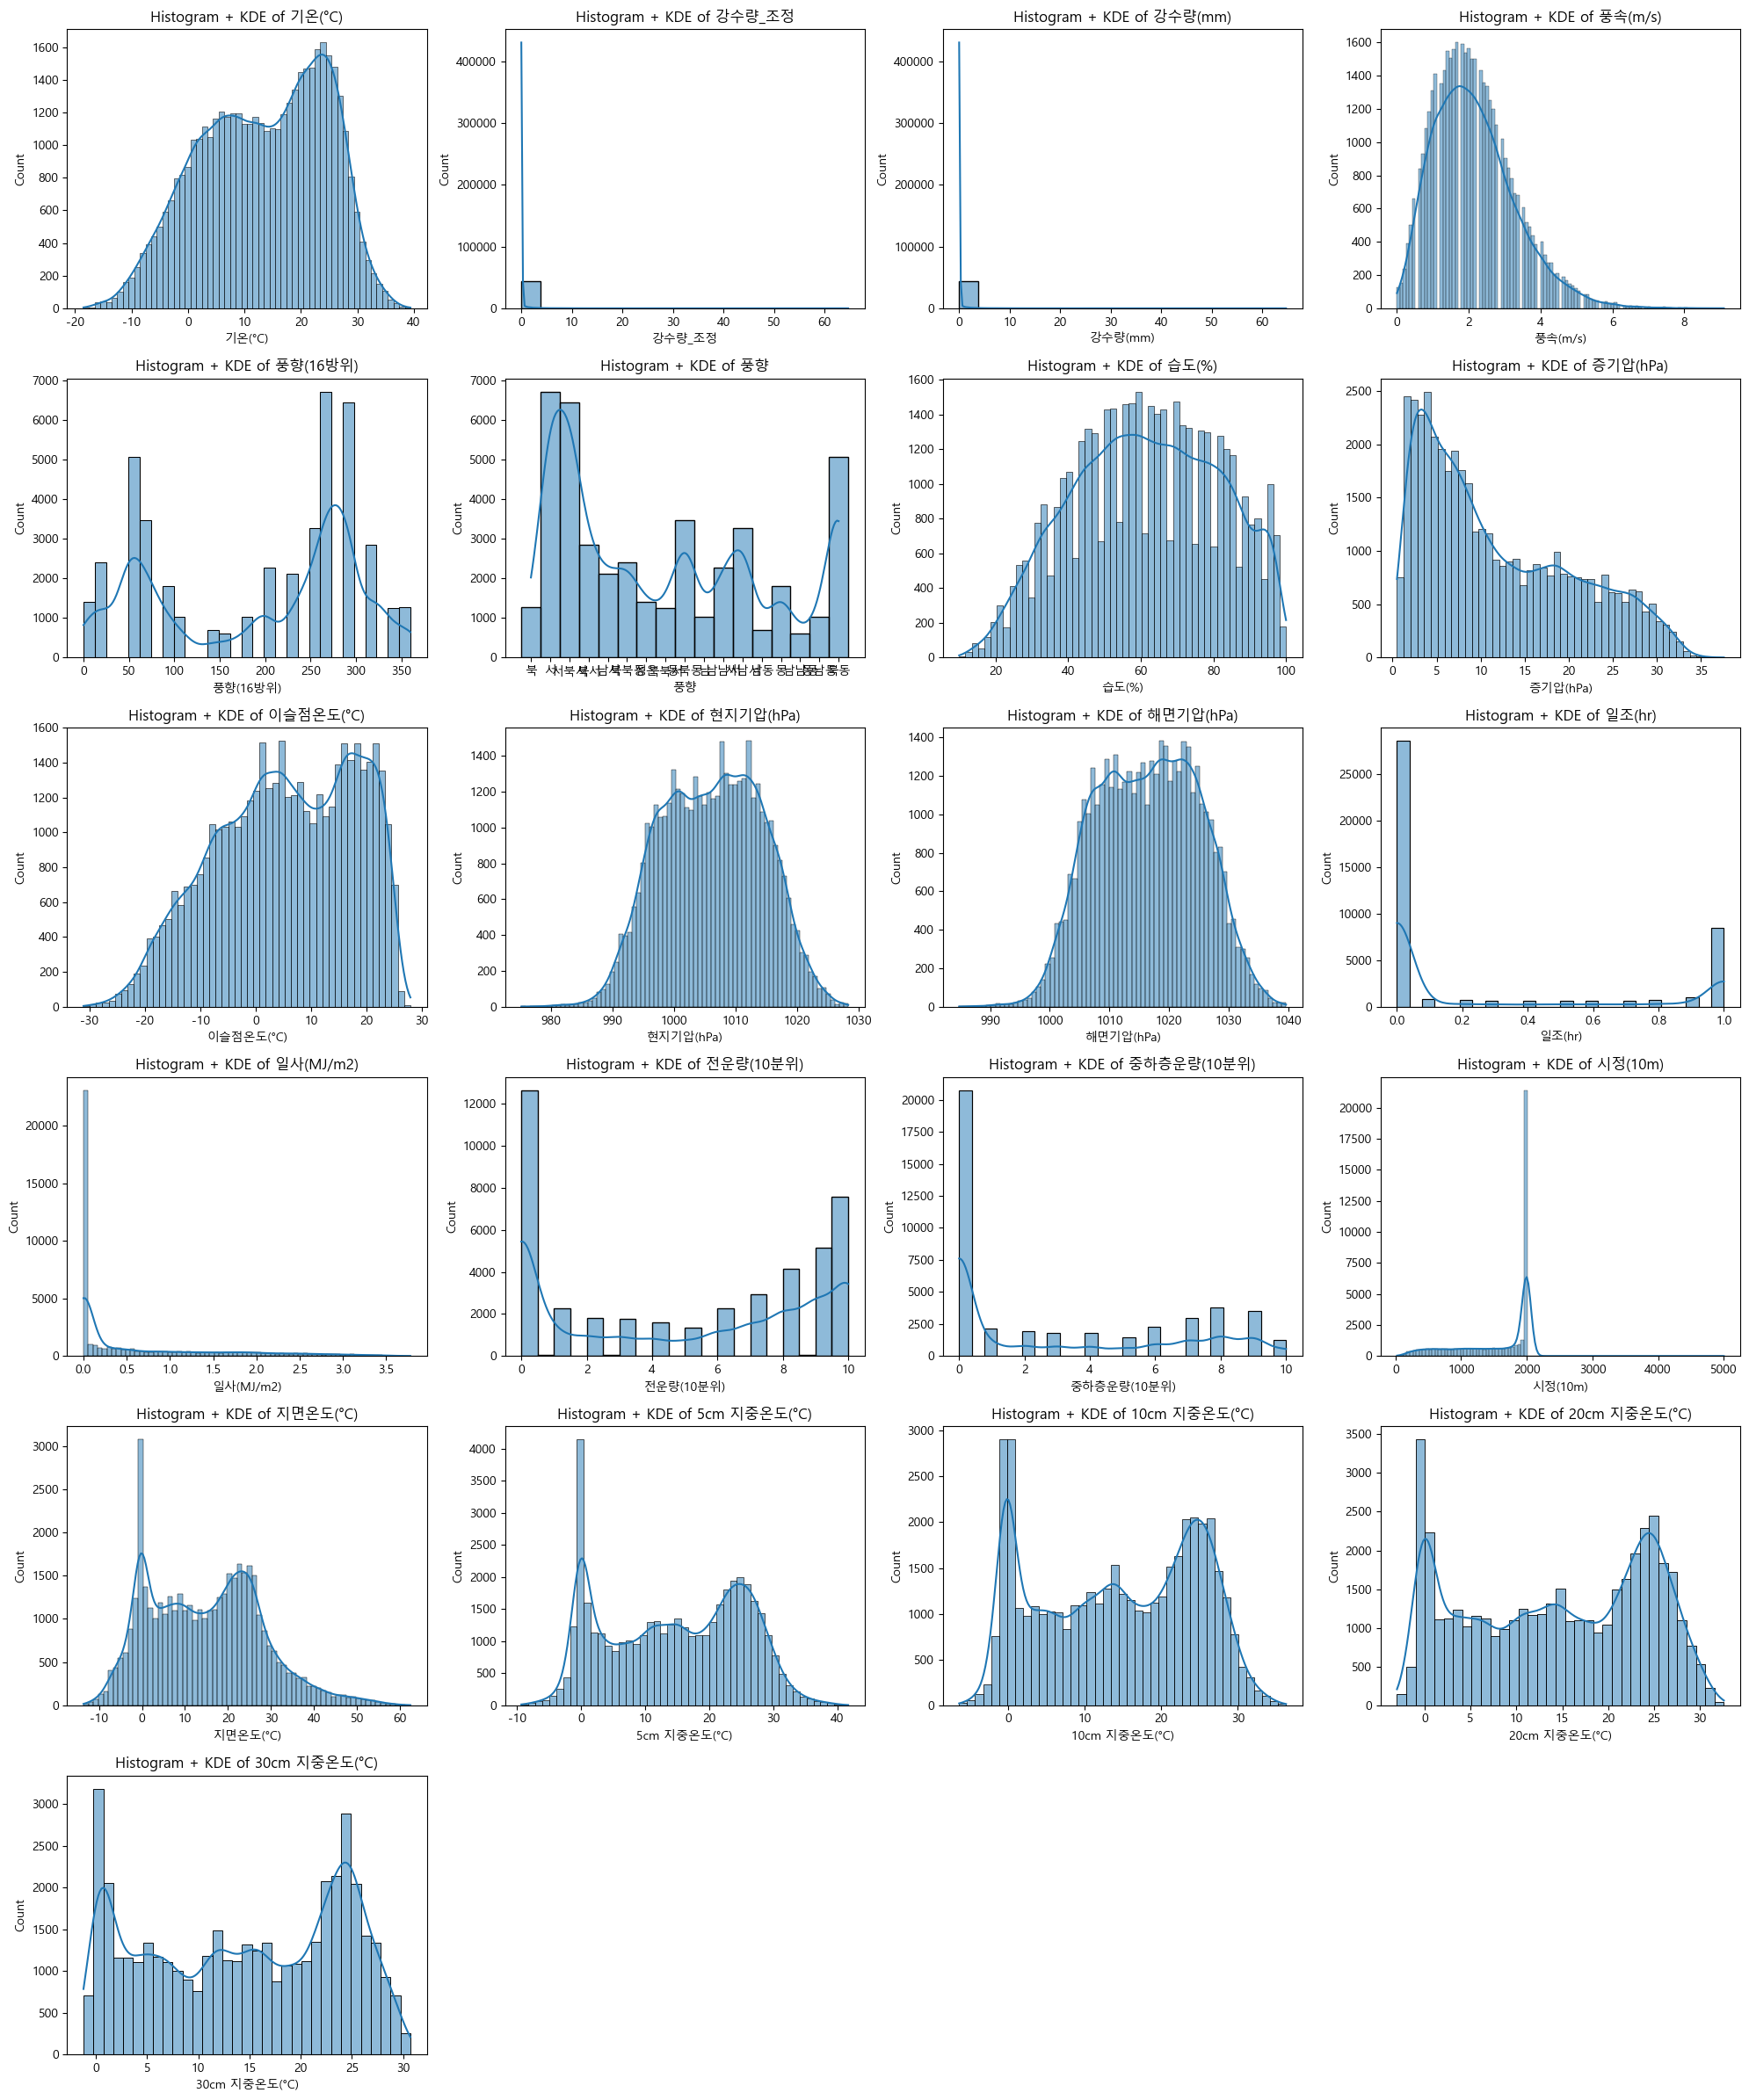

In [55]:
import seaborn as sns

# 히스토그램 + KDE를 통한 이상치 시각화
def plot_histogram_kde(df, columns):
    num_cols = len(columns)
    num_rows = (num_cols // 4) + 1  # 한 행에 최대 4개의 플롯을 배치
    plt.figure(figsize=(20, num_rows * 4))
    for i, col in enumerate(columns, 1):
        plt.subplot(num_rows, 4, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram + KDE of {col}')
    plt.tight_layout()
    plt.show()

# 날씨 변수들
weather_CAI_columns = [ '기온(°C)', '강수량_조정', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '풍향','습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)',
       '일사(MJ/m2)', '전운량(10분위)', '중하층운량(10분위)', '시정(10m)', '지면온도(°C)','5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']

plot_histogram_kde(data, weather_CAI_columns)

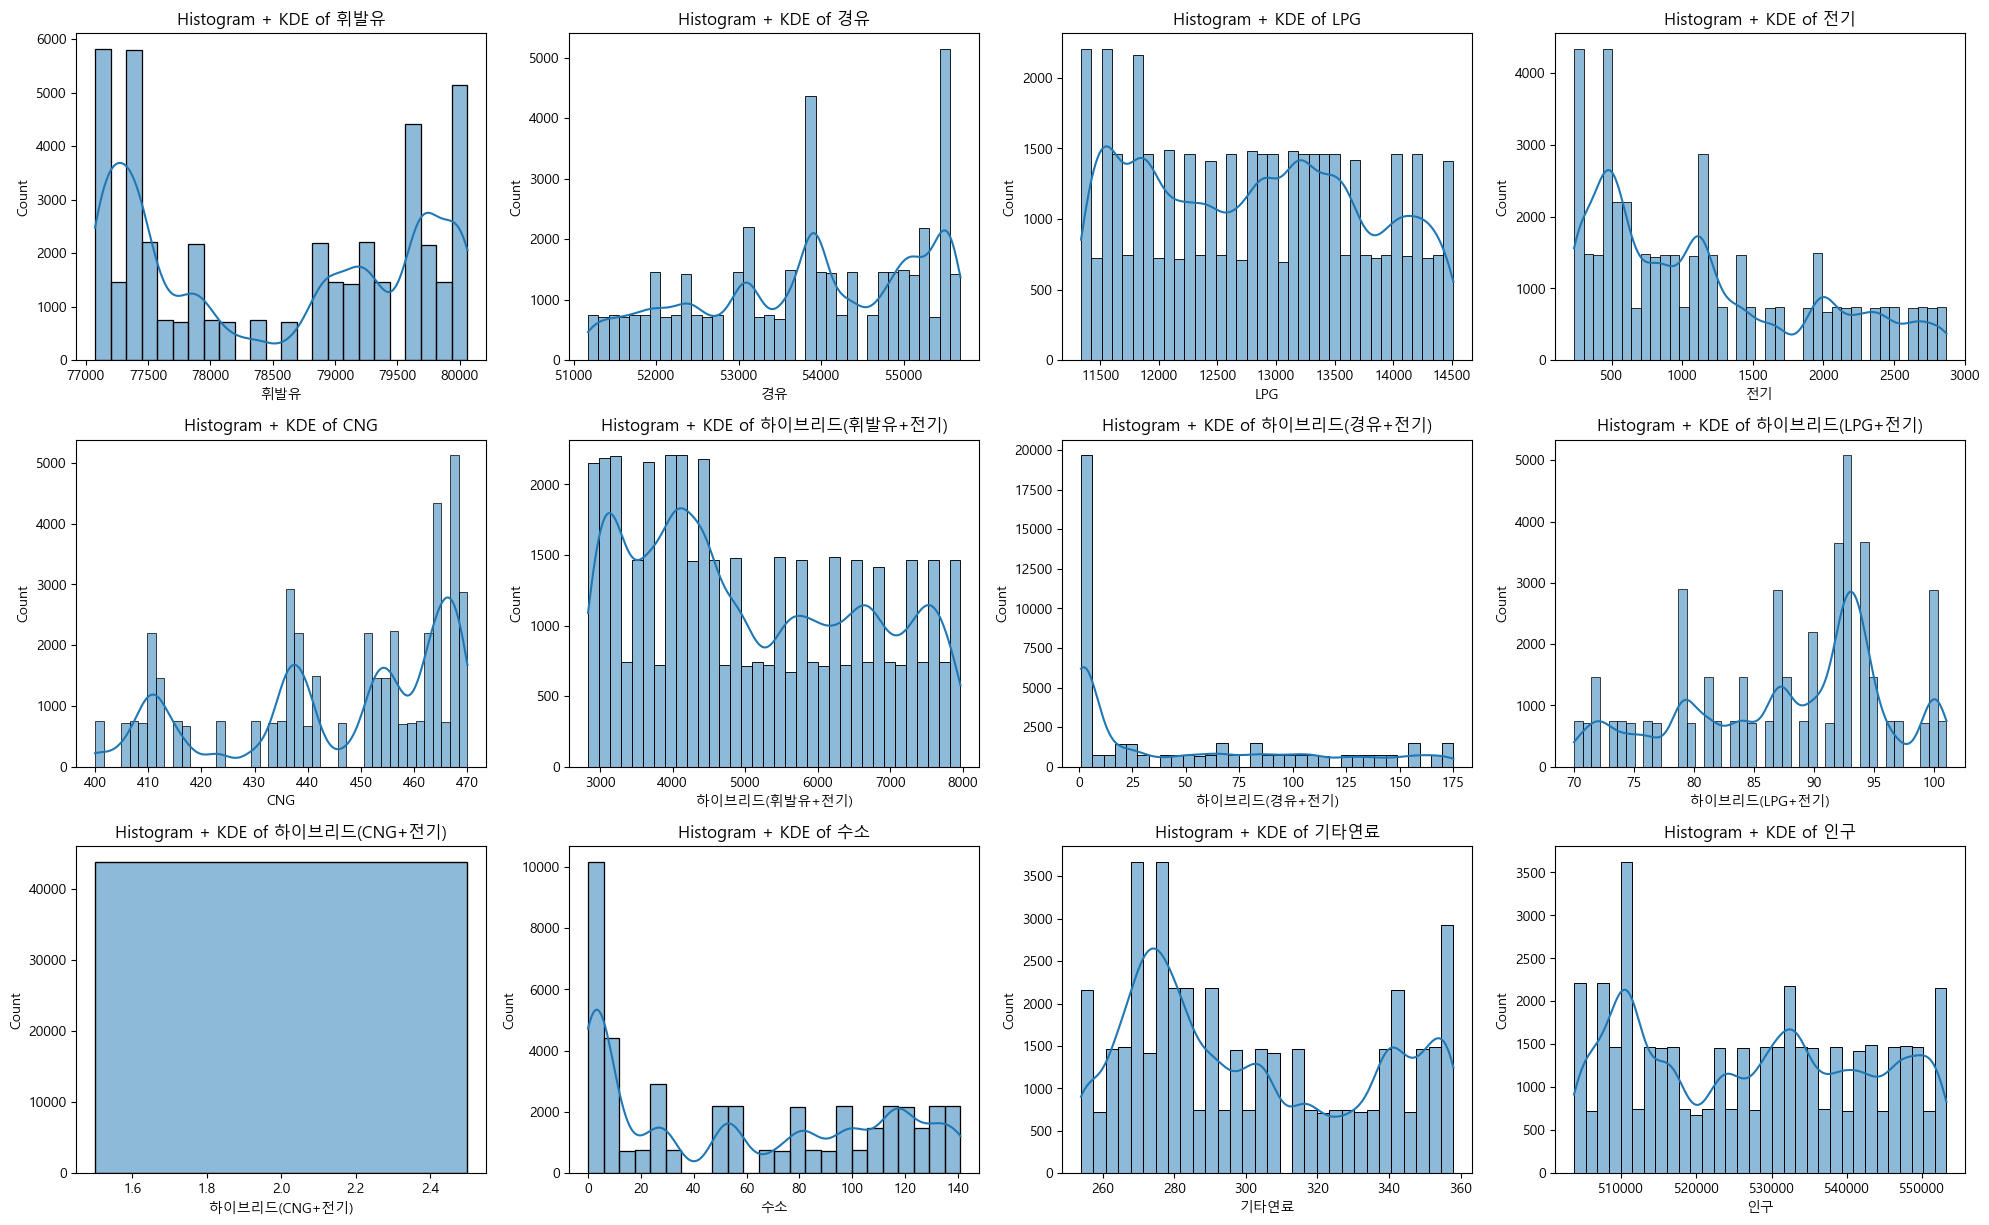

In [56]:
#자동차와 인구데이터 시각화하기

car_pop_columns = ['휘발유', '경유', 'LPG','전기', 'CNG', '하이브리드(휘발유+전기)', '하이브리드(경유+전기)', '하이브리드(LPG+전기)','하이브리드(CNG+전기)', '수소', '기타연료', '인구']

plot_histogram_kde(data, car_pop_columns)

### 이상치에 취급할 데이터 찾기

0이 무의미한 데이터가 아닌 컬럼에 있는 0은 이상치 데이터로 취급하지 않음 -> 강수량(mm), 강수량_조정, 일조(hr), 일사(MJ/m2), 전운량(10분위), 중하층운량(10분위), 수소, 하이브리드(LPG + 전기)
범주형 변수 -> 전운량(10분위), 중하층운량(10분위) , 풍향(16방위), 풍향

weather_CAI_columns = [ '기온(°C)', '풍속(m/s)','습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', 
                        '시정(10m)', '지면온도(°C)','5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']
       
car_pop_columns = ['휘발유', '경유', 'LPG','전기', 'CNG', '하이브리드(휘발유+전기)', '하이브리드(경유+전기)', '하이브리드(LPG+전기)','하이브리드(CNG+전기)', '수소', '기타연료', '인구']

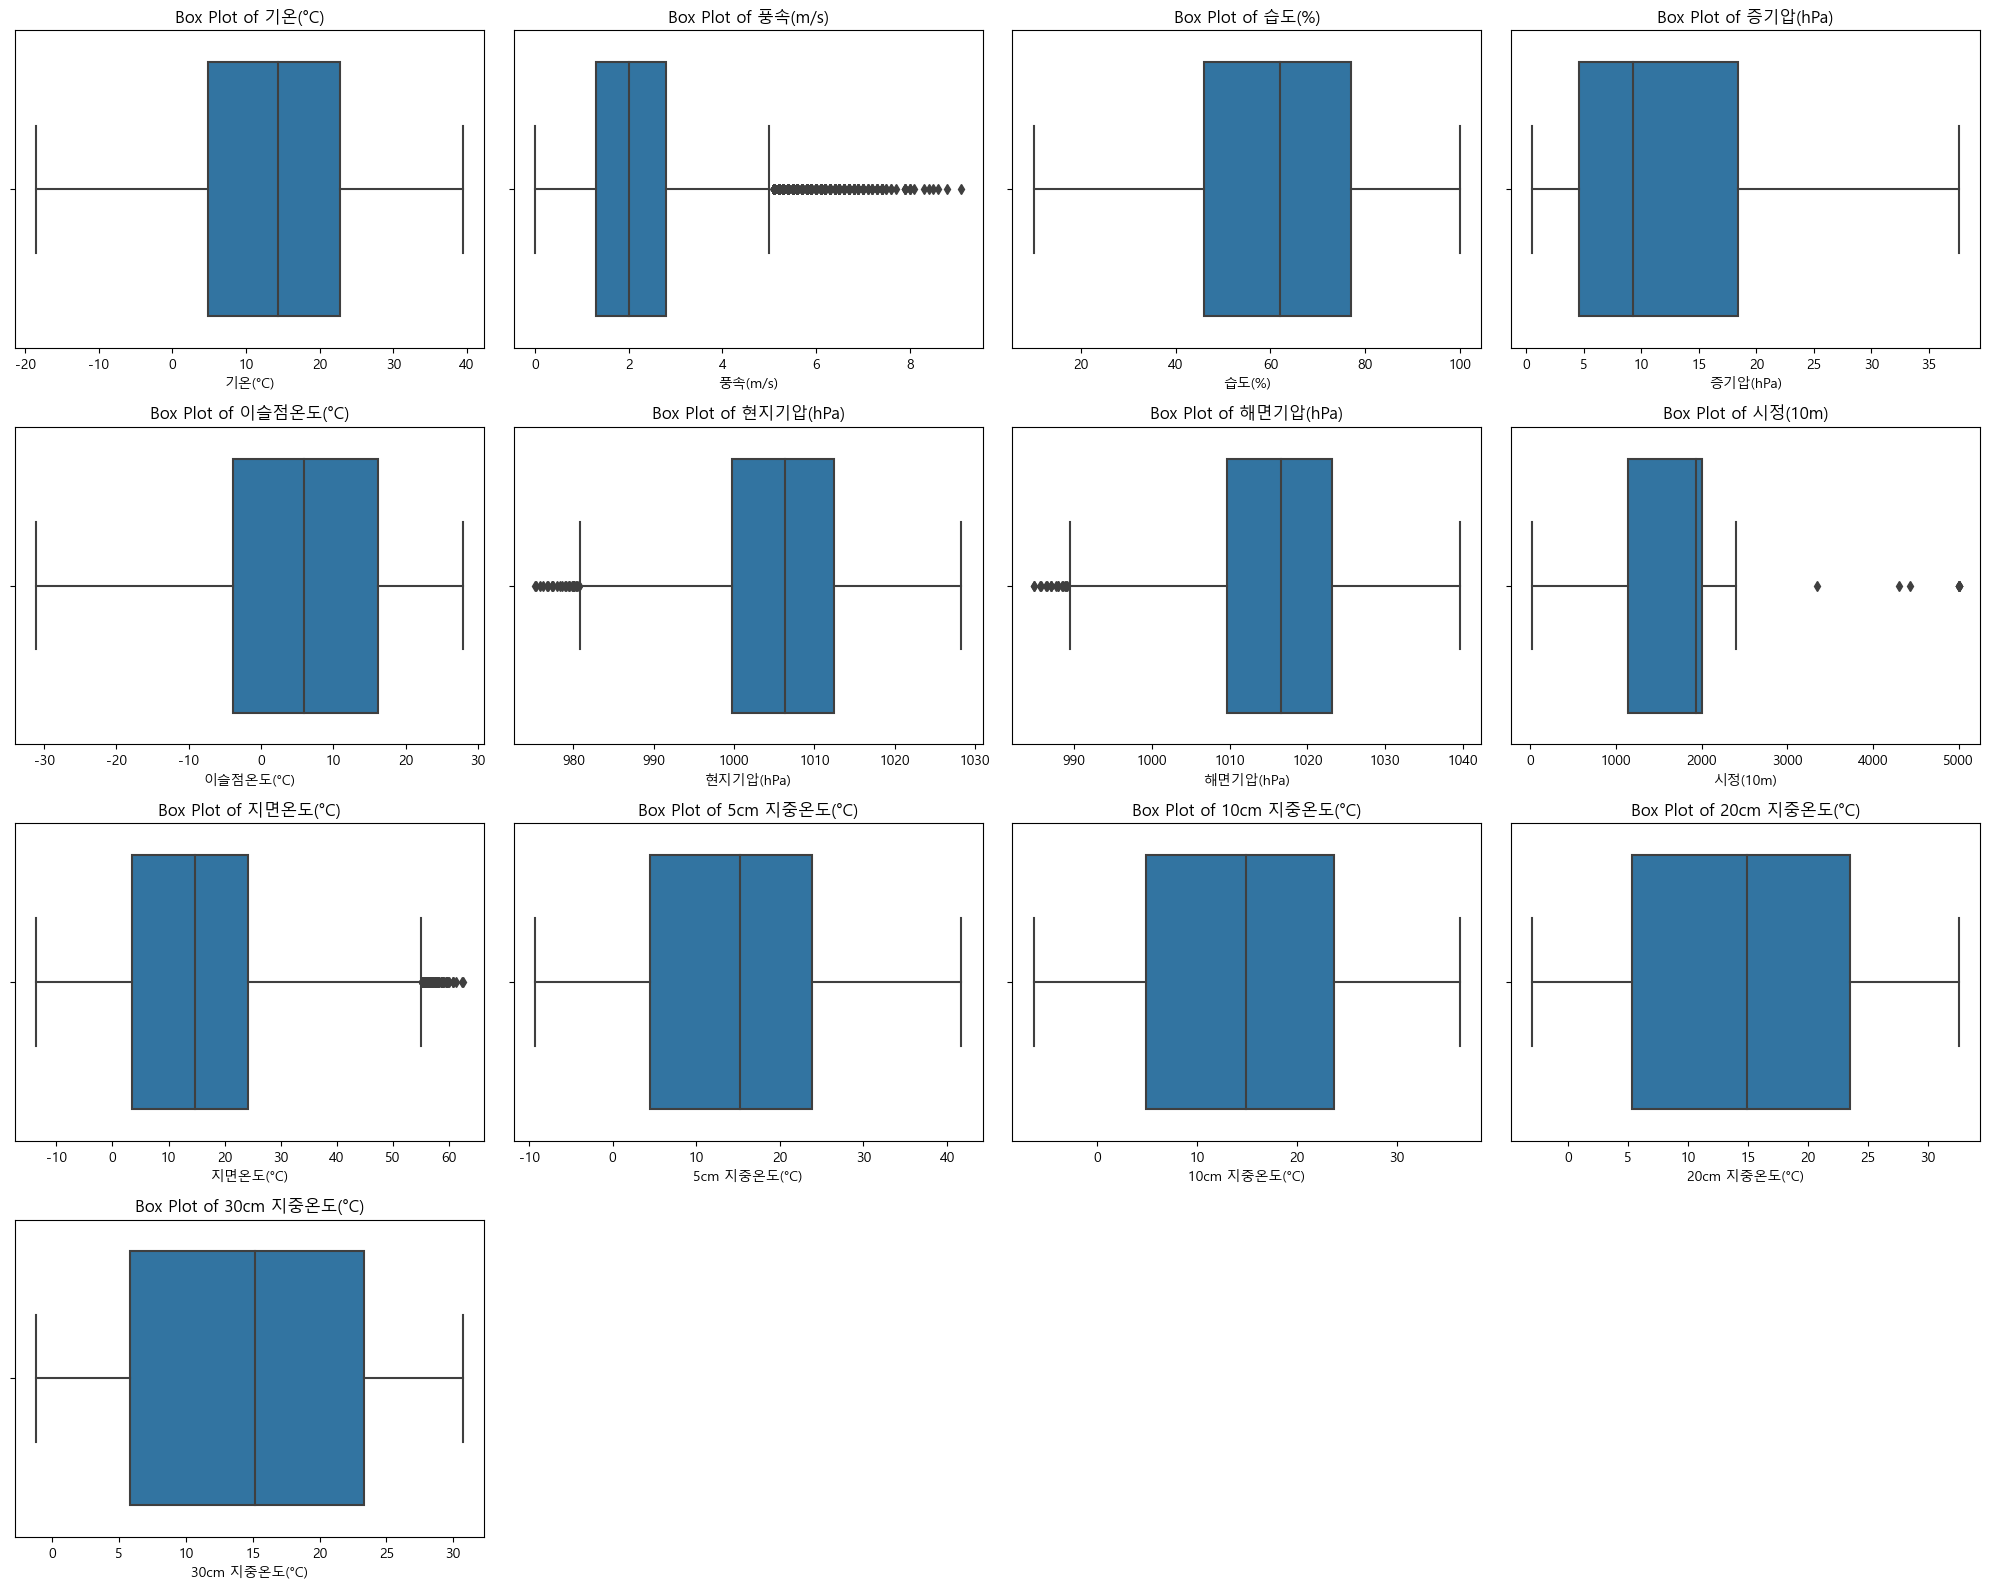

In [57]:
# 박스플롯을 통한 이상치 시각화
def plot_boxplot(df, columns):
    num_cols = len(columns)
    num_rows = (num_cols // 4) + 1  # 한 행에 최대 4개의 플롯을 배치
    plt.figure(figsize=(20, num_rows * 4))
    for i, col in enumerate(columns, 1):
        plt.subplot(num_rows, 4, i)
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

# 의미있어보이는 독립변수들
meaningful_columns = ['기온(°C)', '풍속(m/s)','습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', 
                    '시정(10m)', '지면온도(°C)','5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']

# 이상치 시각화()
plot_boxplot(data, meaningful_columns)
#plot_histogram_kde(data, continuous_columns)

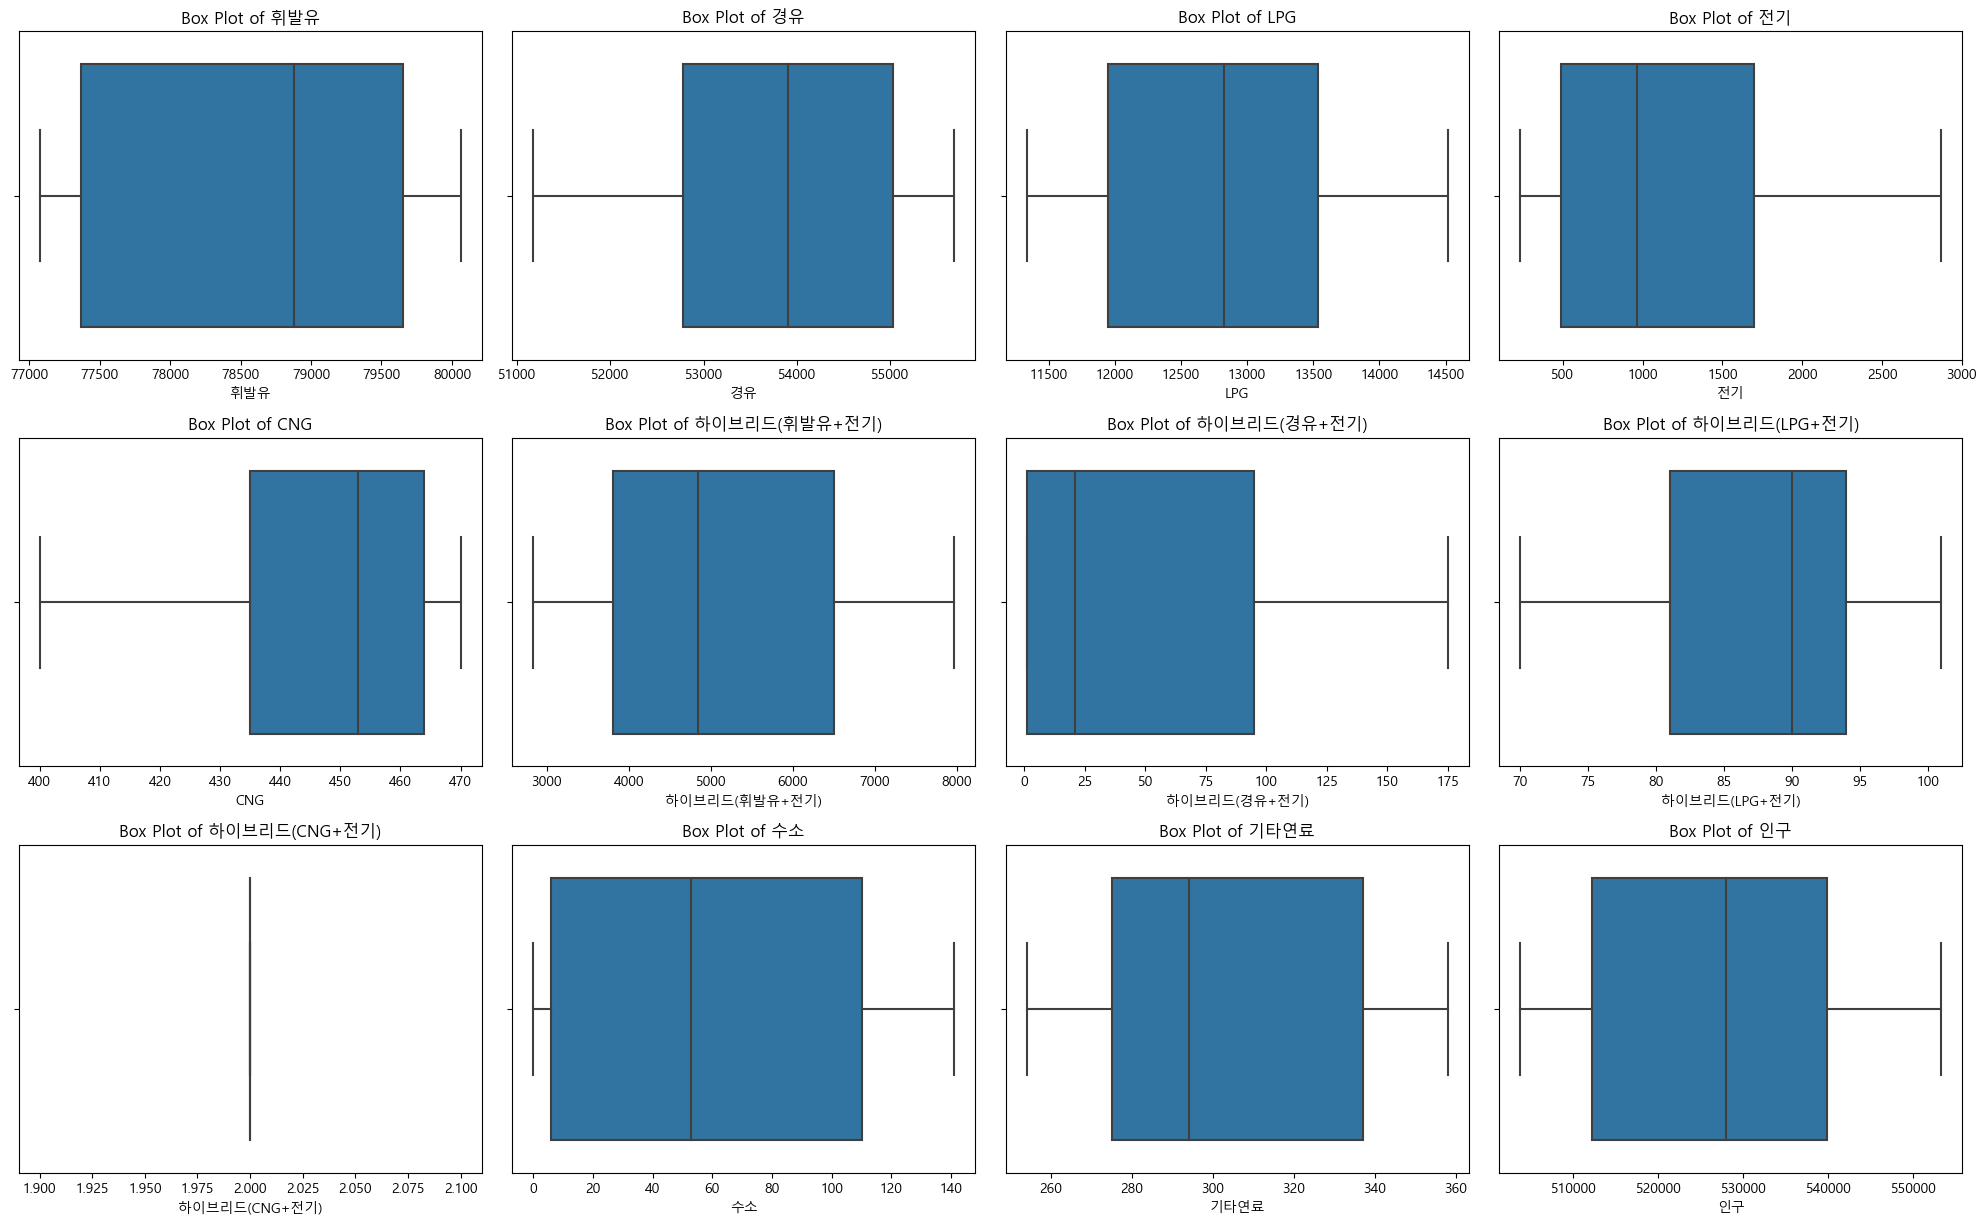

In [58]:
#자동차와 인구에 대한 box plot 그려보기 -> 이상치로 볼만 한 값이 없음
plot_boxplot(data, car_pop_columns)

### 이상치제거 (43778 -> 42916)

In [59]:
#이상치 제거 -> 스케일링

from sklearn.preprocessing import StandardScaler

# IQR을 이용한 이상치 처리 함수
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# 이상치 제거
data = remove_outliers(data, meaningful_columns)

# 스케일링(표준화)
scaler = StandardScaler()
data[meaningful_columns] = scaler.fit_transform(data[meaningful_columns])

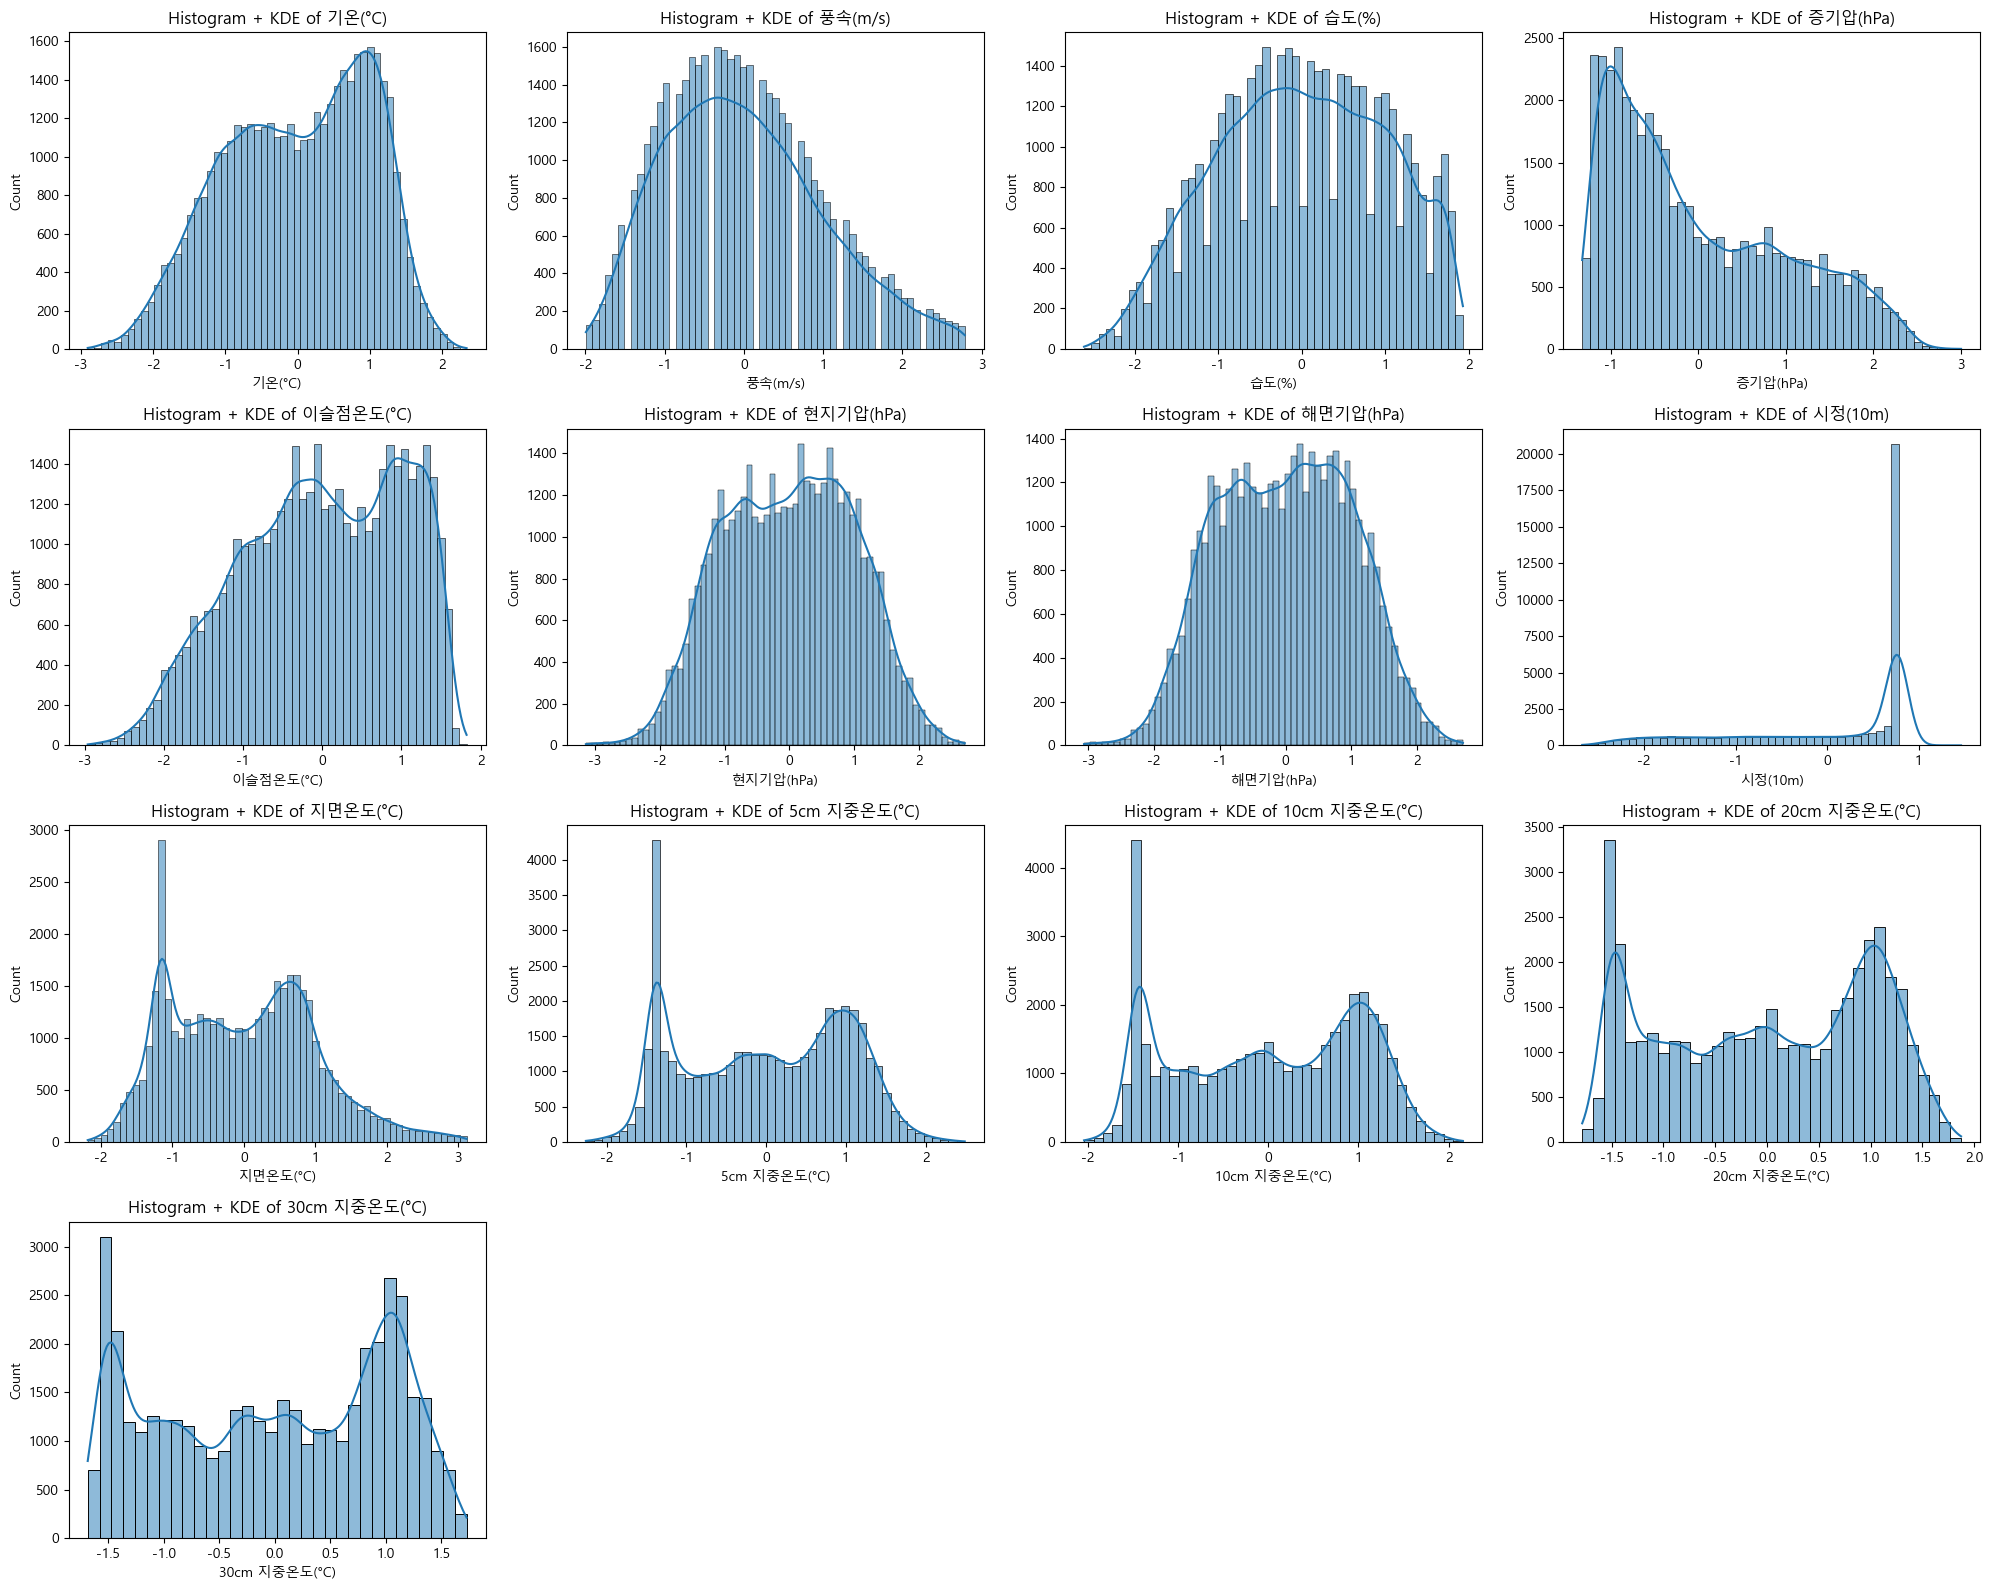

In [60]:
#표준화 후 데이터 다시 확인해보기

plot_histogram_kde(data, meaningful_columns)

In [61]:
data = data.drop(['풍향'], axis = 1)

In [62]:
data.to_csv('./이상치처리_표준화.csv', index = False , encoding = 'utf-8-sig')